<a href="https://colab.research.google.com/github/leidysguerrero120/Trabajo-Analitica-3---RRHH/blob/main/Limpieza_y_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Limpieza de los datos***

In [9]:
###Carga de paquetes y librerías
import warnings
warnings.filterwarnings("ignore")

###Instalación de librerías necesarias
!pip install -q pandas numpy seaborn matplotlib scikit-learn tensorflow keras sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 80.2 MB/s eta 0:00:00


In [10]:
###Importación de librerías
import sqlite3
import pandas as pd
import numpy as np
import requests
import tempfile
import sweetviz as sv
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Para guardar modelos

from pandas.plotting import scatter_matrix
from sklearn.linear_model import (LinearRegression, Ridge, RidgeCV, Lasso, LogisticRegression)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, LeaveOneOut, ShuffleSplit)
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn import datasets, tree, metrics

%matplotlib inline


In [11]:
import pandas as pd
from tabulate import tabulate

###Cargamos el DataFrame desde el archivo CSV en Google Drive
dfdata = pd.read_csv("/content/drive/MyDrive/df_preprocesamiento.csv")

###Mostramos las primeras filas del DataFrame en formato de tabla
print("Primeras filas del DataFrame:")
print(tabulate(dfdata.head(), headers='keys', tablefmt='fancy_grid'))


Primeras filas del DataFrame:
╒════╤═══════╤═══════════════════╤════════════════════════╤════════════════════╤═════════════╤══════════════════╤═════════════════╤══════════════╤══════════╤════════════╤═══════════════════════════╤═════════════════╤═════════════════╤══════════════════════╤══════════╤═════════════════════╤═════════════════╤════════════════════╤═════════════════════╤═════════════════════════╤══════════════════╤═══════════════════════════╤════════════════════════╤════════════╤═══════════════════════════╤═══════════════════╤═══════════════════╤══════════════╤══════════════════╤═════════════════════╤══════════════╤═════════════╤══════════════════╤══════════════════╤═════════════════════╕
│    │   Age │ BusinessTravel    │ Department             │   DistanceFromHome │   Education │ EducationField   │   EmployeeCount │   EmployeeID │ Gender   │   JobLevel │ JobRole                   │ MaritalStatus   │   MonthlyIncome │   NumCompaniesWorked │ Over18   │   PercentSalaryHike │   S

In [12]:
###Revisión inicial de datos
print("Dimensiones del DataFrame:")
print(dfdata.shape)  ###Tamaño del DataFrame

print("\nColumnas del DataFrame:")
print(list(dfdata.columns))  ###Lista de nombres de columnas

print("\nResumen del DataFrame:")
print(dfdata.info())  ###Información del DataFrame

print("\nValores nulos por columna:")
print(dfdata.isnull().sum())  ###Conteo de valores nulos por columna

###Limpieza de datos nulos
###Eliminar filas con valores nulos en columnas críticas
dfdata = dfdata.dropna(subset=['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

###Reemplazar valores nulos en columnas específicas con 'NA'
columnas_reemplazo = ['Attrition', 'retirementDate', 'retirementType']
dfdata[columnas_reemplazo] = dfdata[columnas_reemplazo].fillna('NA')

###Verificación post-limpieza
print("\nDimensiones después de la limpieza:")
print(dfdata.shape)  ###Tamaño del DataFrame después de la limpieza

print("\nResumen del DataFrame después de la limpieza")


Dimensiones del DataFrame:
(8820, 35)

Columnas del DataFrame:
['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'InfoDate', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'DateSurvey', 'JobInvolvement', 'PerformanceRating', 'SurveyDate', 'Attrition', 'retirementDate', 'retirementType', 'resignationReason']

Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 n

In [13]:
!pip install tabulate


In [14]:
import pandas as pd
from tabulate import tabulate

###Obtener categorías únicas de 'resignationReason'
categorias = dfdata['resignationReason'].dropna().unique()
print("Categorías únicas en 'resignationReason':")
print(tabulate([[categoria] for categoria in categorias], headers=['Categoría'], tablefmt='fancy_grid'))

###Reemplazar valores nulos en 'resignationReason' con 'Others'
dfdata['resignationReason'].fillna('Others', inplace=True)

###Conteo de valores nulos por columna
nulos = dfdata.isnull().sum().reset_index()
nulos.columns = ['Columna', 'Nulos']
print("\nConteo de valores nulos por columna:")
print(tabulate(nulos, headers='keys', tablefmt='fancy_grid'))

###Dimensiones del DataFrame
dimensiones = pd.DataFrame([[dfdata.shape[0], dfdata.shape[1]]], columns=['Filas', 'Columnas'])
print("\nDimensiones del DataFrame:")
print(tabulate(dimensiones, headers='keys', tablefmt='fancy_grid'))

###Valores únicos por columna
valores_unicos = {col: dfdata[col].dropna().unique().tolist() for col in dfdata.columns}
valores_unicos_lista = [[col, ', '.join(map(str, valores))] for col, valores in valores_unicos.items()]
print("\nValores únicos por columna:")
print(tabulate(valores_unicos_lista, headers=['Columna', 'Valores Únicos'], tablefmt='fancy_grid'))


Categorías únicas en 'resignationReason':
╒═════════════╕
│ Categoría   │
╞═════════════╡
│ Others      │
├─────────────┤
│ Stress      │
├─────────────┤
│ Salary      │
╘═════════════╛

Conteo de valores nulos por columna:
╒════╤═════════════════════════╤═════════╕
│    │ Columna                 │   Nulos │
╞════╪═════════════════════════╪═════════╡
│  0 │ Age                     │       0 │
├────┼─────────────────────────┼─────────┤
│  1 │ BusinessTravel          │       0 │
├────┼─────────────────────────┼─────────┤
│  2 │ Department              │       0 │
├────┼─────────────────────────┼─────────┤
│  3 │ DistanceFromHome        │       0 │
├────┼─────────────────────────┼─────────┤
│  4 │ Education               │       0 │
├────┼─────────────────────────┼─────────┤
│  5 │ EducationField          │       0 │
├────┼─────────────────────────┼─────────┤
│  6 │ EmployeeCount           │       0 │
├────┼─────────────────────────┼─────────┤
│  7 │ EmployeeID              │       0 │
├─

In [15]:
!pip install plotly
!pip install prettytable
!pip install tabulate


In [16]:
import pandas as pd
import plotly.graph_objects as go

dfdata = pd.read_csv("/content/drive/MyDrive/df_preprocesamiento.csv")

dfdata[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']] = dfdata[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype(str)

dfdata[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = dfdata[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].astype(float)

###Tabla de información básica
info_data = {
    'Attribute': ['Number of Rows', 'Number of Columns', 'Column Names'],
    'Value': [dfdata.shape[0], dfdata.shape[1], ', '.join(dfdata.columns)]
}
info_df = pd.DataFrame(info_data)

info_table = go.Figure(data=[go.Table(
    header=dict(values=info_df.columns,
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[info_df[col] for col in info_df.columns],
               fill_color='white',
               align='left'))
])
info_table.update_layout(title='DataFrame Information', title_x=0.5, height=300)
info_table.show()

head_table = go.Figure(data=[go.Table(
    header=dict(values=dfdata.columns,
                fill_color='blue',
                align='left'),
    cells=dict(values=[dfdata[col].head() for col in dfdata.columns],
               fill_color='white',
               align='left'))
])
head_table.update_layout(title='First Rows of the DataFrame', title_x=0.5, height=500)
head_table.show()


***Análisis Exploratorio***

In [17]:
import plotly.graph_objects as go

In [18]:
numerical_df = dfdata.select_dtypes(include=['float64', 'int64'])

###Calculamos la matriz de correlación
correlation_matrix = numerical_df.corr()

###Creamos el mapa de calor
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    zmin=-1,
    zmax=1,
    colorbar=dict(title='Correlación'),
    hoverongaps=False
))

fig.update_layout(
    title='Mapa de Calor de la Correlación entre Variables',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0),
    template='plotly_dark',
    autosize=True
)

fig.show()


In [19]:
import seaborn as sns
import plotly.express as px


In [20]:
###Convertir 'Attrition' a categórica para mejor visualización
dfdata['Attrition'] = dfdata['Attrition'].astype('category')

###Gráfico de Edad vs Retiros
fig_age = px.histogram(dfdata, x='Age', color='Attrition', barmode='group',
                       color_discrete_map={'Yes': 'red', 'No': 'blue'},
                       labels={'Age': 'Edad', 'Attrition': 'Retiros'},
                       title='Distribución de Retiros por Edad',
                       height=500)

###Gráfico de Años Totales Trabajados vs Retiros
fig_working_years = px.histogram(dfdata, x='TotalWorkingYears', color='Attrition', barmode='group',
                                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                                 labels={'TotalWorkingYears': 'Años Trabajados', 'Attrition': 'Retiros'},
                                 title='Distribución de Retiros por Total de Años Trabajados',
                                 height=500)

fig_age.show()
fig_working_years.show()


In [21]:
import plotly.express as px

# Convertir 'Attrition' a categórica para mejor visualización
dfdata['Attrition'] = dfdata['Attrition'].astype('category')

# Gráfico de % Incremento del Salario vs Retiros
fig_salary_hike = px.histogram(dfdata, x='PercentSalaryHike', color='Attrition', barmode='group',
                               color_discrete_map={'Yes': 'red', 'No': 'blue'},
                               labels={'PercentSalaryHike': '% Incremento del Salario', 'Attrition': 'Retiros'},
                               title='Distribución de Retiros por % Incremento del Salario',
                               height=500)

# Gráfico de Clasificación de Rendimiento vs Retiros
fig_performance_rating = px.histogram(dfdata, x='PerformanceRating', color='Attrition', barmode='group',
                                      color_discrete_map={'Yes': 'red', 'No': 'blue'},
                                      labels={'PerformanceRating': 'Clasificación de Rendimiento', 'Attrition': 'Retiros'},
                                      title='Distribución de Retiros por Clasificación de Rendimiento',
                                      height=500)

# Mostrar los gráficos
fig_salary_hike.show()
fig_performance_rating.show()


In [22]:
import plotly.express as px
import plotly.subplots as sp

# Convertir 'Attrition' a categórica para una mejor visualización
dfdata['Attrition'] = dfdata['Attrition'].astype('category')

# Crear una figura con subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Retiros por Años en la Compañía',
                                                        'Retiros por Años Desde la Última Promoción',
                                                        'Retiros por Años Bajo el Mando del Gerente Actual'))

# Gráfico de Años en la Compañía
fig.add_trace(
    px.histogram(dfdata, x='YearsAtCompany', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'YearsAtCompany': 'Años en la Compañía', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Años en la Compañía',
                 height=500).data[0],
    row=1, col=1
)

# Gráfico de Años Desde la Última Promoción
fig.add_trace(
    px.histogram(dfdata, x='YearsSinceLastPromotion', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'YearsSinceLastPromotion': 'Años Desde la Última Promoción', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Años Desde la Última Promoción',
                 height=500).data[0],
    row=1, col=2
)

# Gráfico de Años Bajo el Mando del Gerente Actual
fig.add_trace(
    px.histogram(dfdata, x='YearsWithCurrManager', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'YearsWithCurrManager': 'Años Bajo el Mando del Gerente Actual', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Años Bajo el Mando del Gerente Actual',
                 height=500).data[0],
    row=1, col=3
)

# Actualizar el diseño de la figura
fig.update_layout(
    title_text='Relación entre Años en la Compañía, Años Desde la Última Promoción y Años Bajo el Mando del Gerente Actual con Retiros',
    height=600,
    showlegend=True
)

# Mostrar los gráficos
fig.show()


In [23]:
import plotly.express as px
import plotly.subplots as sp

# Convertir 'Attrition' a categórica para una mejor visualización
dfdata['Attrition'] = dfdata['Attrition'].astype('category')

# Crear una figura con subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=(
    'Satisfacción con el Ambiente Laboral',
    'Satisfacción con el Trabajo',
    'Balance Vida-Trabajo'
))

# Gráfico de Satisfacción con el Ambiente Laboral
fig.add_trace(
    px.histogram(dfdata, x='EnvironmentSatisfaction', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'EnvironmentSatisfaction': 'Satisfacción Ambiente Laboral', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Satisfacción con el Ambiente Laboral').data[0],
    row=1, col=1
)

# Gráfico de Satisfacción con el Trabajo
fig.add_trace(
    px.histogram(dfdata, x='JobSatisfaction', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'JobSatisfaction': 'Satisfacción con el Trabajo', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Satisfacción con el Trabajo').data[0],
    row=1, col=2
)

# Gráfico de Balance Vida-Trabajo
fig.add_trace(
    px.histogram(dfdata, x='WorkLifeBalance', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'WorkLifeBalance': 'Balance Vida-Trabajo', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Balance Vida-Trabajo').data[0],
    row=1, col=3
)

# Actualizar el diseño de la figura
fig.update_layout(
    title_text='Relación entre Satisfacción del Ambiente Laboral, Satisfacción con el Trabajo y Balance Vida-Trabajo con Retiros',
    height=600,
    showlegend=True,
    legend=dict(
        x=1.05,  # Mover la leyenda a la derecha
        y=0.5,
        traceorder='normal',
        orientation='v'
    ),
    xaxis_title='Nivel de Satisfacción',
    yaxis_title='Frecuencia'
)

# Mostrar los gráficos
fig.show()


  Attrition  Salario Promedio
0       Yes          61682.62


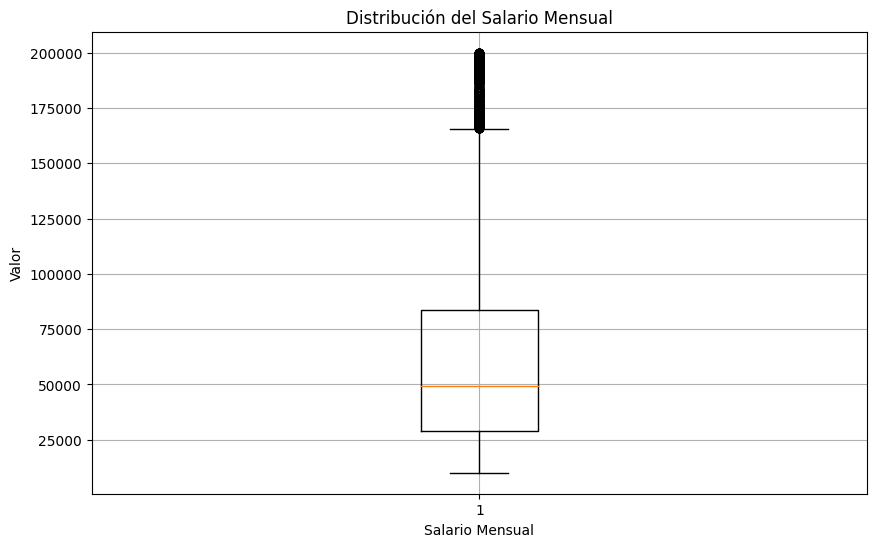

In [24]:
import plotly.express as px
import plotly.subplots as sp
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'Attrition' a categórica para una mejor visualización
dfdata['Attrition'] = dfdata['Attrition'].astype('category')

# Crear una figura con subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=(
    'Nivel de Inclusión en el Trabajo',
    'Viajes de Negocios',
    'Razones de Renuncia'
))

# Gráfico de Nivel de Inclusión en el Trabajo
fig.add_trace(
    px.histogram(dfdata, x='JobInvolvement', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'JobInvolvement': 'Nivel de Inclusión en el Trabajo', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Nivel de Inclusión en el Trabajo').data[0],
    row=1, col=1
)

# Gráfico de Viajes de Negocios
fig.add_trace(
    px.histogram(dfdata, x='BusinessTravel', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'BusinessTravel': 'Viajes de Negocios', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Viajes de Negocios').data[0],
    row=1, col=2
)

# Gráfico de Razones de Renuncia
fig.add_trace(
    px.histogram(dfdata, x='resignationReason', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'resignationReason': 'Razones de Renuncia', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Razones de Renuncia').data[0],
    row=1, col=3
)

# Actualizar el diseño de la figura
fig.update_layout(
    title_text='Relación entre Inclusión en el Trabajo, Viajes de Negocios y Razones de Renuncia con Retiros',
    height=600,
    showlegend=True,
    legend=dict(
        x=1.05,  # Mover la leyenda a la derecha
        y=0.5,
        traceorder='normal',
        orientation='v'
    ),
    xaxis_title='Categoría',
    yaxis_title='Frecuencia'
)

# Mostrar los gráficos
fig.show()

# Análisis del salario mensual
# Promedio de salario mensual de empleados que renuncian
salario_promedio = dfdata.groupby("Attrition")[["MonthlyIncome"]].mean().round(2).reset_index().rename(columns={'MonthlyIncome':'Salario Promedio'})
print(salario_promedio)

# Gráfico de caja para el salario mensual
plt.figure(figsize=(10, 6))
plt.boxplot(dfdata['MonthlyIncome'])
plt.title('Distribución del Salario Mensual')
plt.xlabel('Salario Mensual')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


In [25]:
import plotly.express as px
import plotly.subplots as sp

# Convertir 'Attrition' a categórica para una mejor visualización
dfdata['Attrition'] = dfdata['Attrition'].astype('category')

# Crear una figura con subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=(
    'Nivel de Trabajo',
    'Nivel de Opción de Acciones',
    'Distancia de la Casa al Trabajo'
))

# Gráfico de Nivel de Trabajo
fig.add_trace(
    px.histogram(dfdata, x='JobLevel', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'JobLevel': 'Nivel de Trabajo', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Nivel de Trabajo').data[0],
    row=1, col=1
)

# Gráfico de Nivel de Opción de Acciones
fig.add_trace(
    px.histogram(dfdata, x='StockOptionLevel', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'StockOptionLevel': 'Nivel de Opción de Acciones', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Nivel de Opción de Acciones').data[0],
    row=1, col=2
)

# Gráfico de Distancia de la Casa al Trabajo
fig.add_trace(
    px.histogram(dfdata, x='DistanceFromHome', color='Attrition', barmode='group',
                 color_discrete_map={'Yes': 'red', 'No': 'blue'},
                 labels={'DistanceFromHome': 'Distancia de la Casa al Trabajo', 'Attrition': 'Retiros'},
                 title='Distribución de Retiros por Distancia de la Casa al Trabajo').data[0],
    row=1, col=3
)

# Actualizar el diseño de la figura
fig.update_layout(
    title_text='Relación entre Nivel de Trabajo, Nivel de Opción de Acciones y Distancia de la Casa al Trabajo con Retiros',
    height=600,
    showlegend=True,
    legend=dict(
        x=1.05,  # Mover la leyenda a la derecha
        y=0.5,
        traceorder='normal',
        orientation='v'
    ),
    xaxis_title='Categoría',
    yaxis_title='Frecuencia'
)

# Mostrar los gráficos
fig.show()


In [26]:
import pandas as pd

# Guardar el DataFrame en un archivo CSV
dfdata.to_csv('df_clean.csv', index=False)


In [27]:
import pandas as pd

# Crear una lista para almacenar los resultados
resultados_diferencias = []

# Agrupar los datos por EmployeeID
for empleado_id, grupo in dfdata.groupby('EmployeeID'):
    if len(grupo) == 2:  # Solo considerar aquellos EmployeeID con datos para ambos años
        datos_2015 = grupo[grupo['InfoDate'] == 2015]
        datos_2016 = grupo[grupo['InfoDate'] == 2016]

        # Verificar si hay datos para ambos años
        if not datos_2015.empty and not datos_2016.empty:
            datos_2015 = datos_2015.iloc[0]
            datos_2016 = datos_2016.iloc[0]

            # Comparar las columnas específicas
            columnas_a_comparar = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
            if not datos_2015[columnas_a_comparar].equals(datos_2016[columnas_a_comparar]):
                resultados_diferencias.append({
                    'EmployeeID': empleado_id,
                    'EnvironmentSatisfaction_2015': datos_2015['EnvironmentSatisfaction'],
                    'EnvironmentSatisfaction_2016': datos_2016['EnvironmentSatisfaction'],
                    'JobSatisfaction_2015': datos_2015['JobSatisfaction'],
                    'JobSatisfaction_2016': datos_2016['JobSatisfaction'],
                    'WorkLifeBalance_2015': datos_2015['WorkLifeBalance'],
                    'WorkLifeBalance_2016': datos_2016['WorkLifeBalance'],
                    'JobInvolvement_2015': datos_2015['JobInvolvement'],
                    'JobInvolvement_2016': datos_2016['JobInvolvement'],
                    'PerformanceRating_2015': datos_2015['PerformanceRating'],
                    'PerformanceRating_2016': datos_2016['PerformanceRating']
                })

# Convertir la lista de resultados en un DataFrame
df_resultados = pd.DataFrame(resultados_diferencias)

# Mostrar el DataFrame
if not df_resultados.empty:
    print("Empleados con diferencias en los datos entre 2015 y 2016:")
    print(df_resultados)
else:
    print("No se encontraron diferencias para ningún EmployeeID.")


No se encontraron diferencias para ningún EmployeeID.


In [29]:
dfdata.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
0,51.0,Travel_Rarely,Sales,6.0,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN
1,31.0,Travel_Frequently,Research & Development,10.0,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2015-12-31,2,4,2015-12-31,Yes,2016-10-15,Resignation,Others
2,32.0,Travel_Frequently,Research & Development,17.0,4,Other,1,3,Male,4,...,2.0,1.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN
3,38.0,Non-Travel,Research & Development,2.0,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2015-12-31,2,3,2015-12-31,NaN,NaN,NaN,NaN
4,32.0,Travel_Rarely,Research & Development,10.0,1,Medical,1,5,Male,1,...,1.0,3.0,2015-12-31,3,3,2015-12-31,NaN,NaN,NaN,NaN


In [30]:
# Convertir la columna 'InfoDate' a formato de fecha
dfdata['InfoDate'] = pd.to_datetime(dfdata['InfoDate'])

# Filtrar el DataFrame para obtener solo los datos del año 2016
dfdataN = dfdata[dfdata['InfoDate'].dt.year == 2016].copy()

# Mostrar las primeras 5 filas del nuevo DataFrame
dfdataN.head()


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,JobSatisfaction,WorkLifeBalance,DateSurvey,JobInvolvement,PerformanceRating,SurveyDate,Attrition,retirementDate,retirementType,resignationReason
4410,51.0,Travel_Rarely,Sales,6.0,2,Life Sciences,1,1,Female,1,...,4.0,2.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,NaN
4411,31.0,Travel_Frequently,Research & Development,10.0,1,Life Sciences,1,2,Female,1,...,2.0,4.0,2016-12-31,2,4,2016-12-31,Yes,2016-10-15,Resignation,Others
4412,32.0,Travel_Frequently,Research & Development,17.0,4,Other,1,3,Male,4,...,2.0,1.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,NaN
4413,38.0,Non-Travel,Research & Development,2.0,5,Life Sciences,1,4,Male,3,...,4.0,3.0,2016-12-31,2,3,2016-12-31,NaN,NaN,NaN,NaN
4414,32.0,Travel_Rarely,Research & Development,10.0,1,Medical,1,5,Male,1,...,1.0,3.0,2016-12-31,3,3,2016-12-31,NaN,NaN,NaN,NaN


***Métricas***

In [41]:
dfdataN=dfdataN.astype({"JobInvolvement":object,"EmployeeCount":object,"StandardHours":object,"PerformanceRating":object,"EnvironmentSatisfaction":object,"JobSatisfaction":object,"WorkLifeBalance":object,"TrainingTimesLastYear":object,"StockOptionLevel":object,"JobLevel":object,"Education":object })
X=dfdataN.drop(["EmployeeID"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 4410 to 8819
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Age                      4410 non-null   float64       
 1   BusinessTravel           4410 non-null   object        
 2   Department               4410 non-null   object        
 3   DistanceFromHome         4410 non-null   float64       
 4   Education                4410 non-null   object        
 5   EducationField           4410 non-null   object        
 6   EmployeeCount            4410 non-null   object        
 7   Gender                   4410 non-null   object        
 8   JobLevel                 4410 non-null   object        
 9   JobRole                  4410 non-null   object        
 10  MaritalStatus            4410 non-null   object        
 11  MonthlyIncome            4410 non-null   float64       
 12  NumCompaniesWorked       4391 non-nu